In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering
import joblib

In [2]:
df = pd.read_csv("pricerunner_aggregate.csv")

In [3]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(exclude='object').columns.tolist()

In [4]:
preprocessor = ColumnTransformer(transformers=[
    ("cat", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_cols),
    ("num", StandardScaler(), num_cols)
])

In [6]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("cluster", AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward'))
])

In [8]:
pipeline.fit(df)
joblib.dump(pipeline, "clustering_pipeline.joblib")
pipeline.fit_predict(df)

array([2, 2, 2, ..., 0, 4, 1], shape=(35311,))

<Axes: >

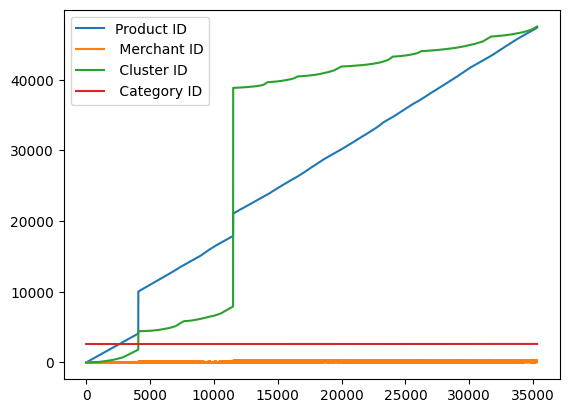

In [9]:
df.plot()